In [8]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [9]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [10]:
len(X_train)

60000

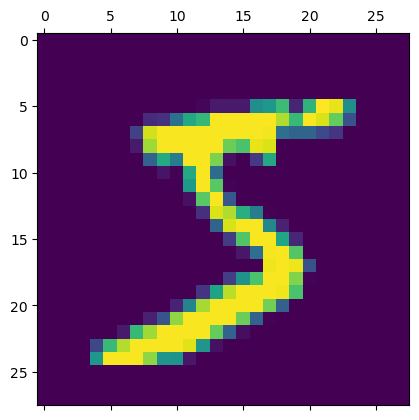

In [11]:
plt.matshow(X_train[0])

In [12]:
X_train = X_train / 255
X_test = X_test / 255

In [13]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [14]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)



Epoch 1/5


1875/1875 [==============================] - 3s 1ms/step - loss: 0.4648 - accuracy: 0.8789
Epoch 2/5
1875/1875 [==============================] - 2s 958us/step - loss: 0.3033 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 2s 982us/step - loss: 0.2835 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2726 - accuracy: 0.9243
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2664 - accuracy: 0.9265


In [15]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 937us/step - loss: 0.2678 - accuracy: 0.9252


[0.2677741050720215, 0.9251999855041504]

In [16]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 773us/step


array([1.3043312e-02, 3.2460400e-07, 5.8176998e-02, 9.5338744e-01,
       1.7835763e-03, 8.4229752e-02, 6.6394352e-07, 9.9978393e-01,
       9.9952407e-02, 6.2705821e-01], dtype=float32)

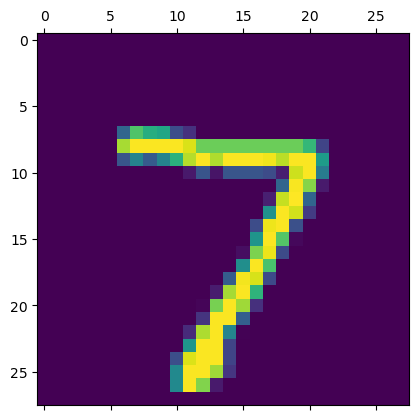

In [18]:
plt.matshow(X_test[0])

In [19]:
np.argmax(y_predicted[0])

7

In [20]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [21]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    1,    2,    0,    7,    3,    3,    4,    1],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   3,   11,  914,   20,    7,    6,   10,   10,   48,    3],
       [   1,    0,   17,  927,    0,   23,    2,   11,   23,    6],
       [   1,    2,    6,    2,  917,    0,    8,    4,   10,   32],
       [   7,    3,    4,   33,    9,  778,    9,    6,   35,    8],
       [  11,    3,    9,    2,    7,   17,  903,    2,    4,    0],
       [   1,    9,   20,    8,    7,    0,    0,  946,    4,   33],
       [   4,   11,    5,   22,    9,   20,    7,   12,  878,    6],
       [   9,    7,    1,   11,   30,    4,    0,   26,    9,  912]])>

Text(95.72222222222221, 0.5, 'Truth')

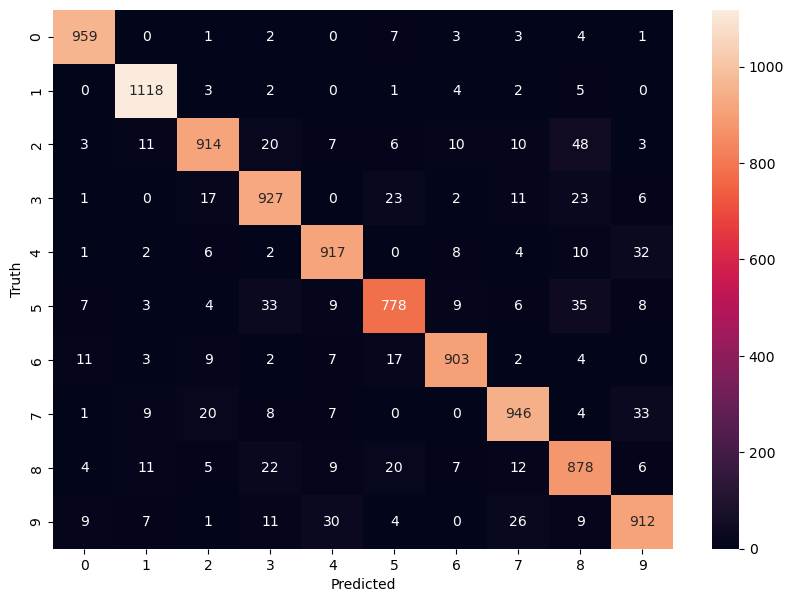

In [22]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [23]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2701 - accuracy: 0.9222
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1242 - accuracy: 0.9633
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0879 - accuracy: 0.9742
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0672 - accuracy: 0.9793
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0525 - accuracy: 0.9844


In [24]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 958us/step - loss: 0.0911 - accuracy: 0.9724


[0.09108500927686691, 0.9724000096321106]

313/313 [==============================] - 0s 818us/step


Text(95.72222222222221, 0.5, 'Truth')

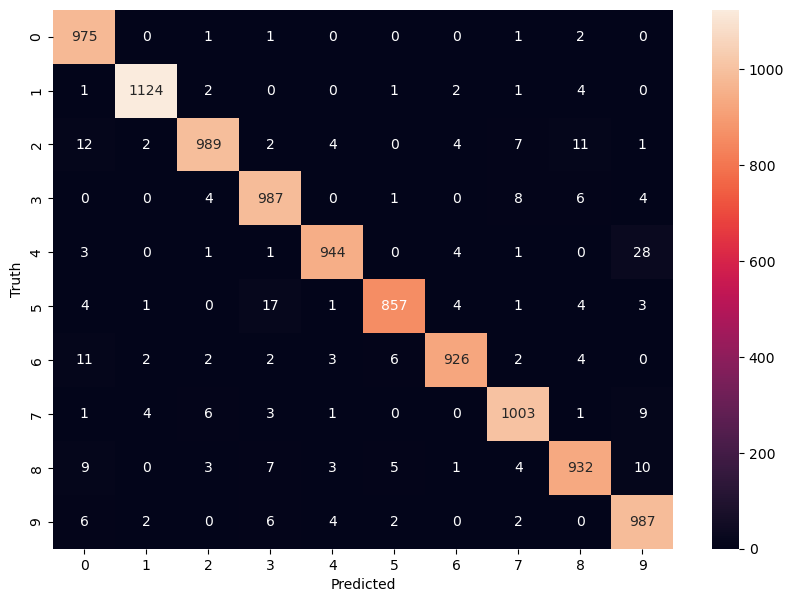

In [25]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [26]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2749 - accuracy: 0.9210
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1227 - accuracy: 0.9640
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0871 - accuracy: 0.9740
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0666 - accuracy: 0.9794
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0526 - accuracy: 0.9841
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0431 - accuracy: 0.9866
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0343 - accuracy: 0.9895
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0285 - accuracy: 0.9912
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0247 - accuracy: 0.9926
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.019

In [27]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0799 - accuracy: 0.9796


[0.07987599819898605, 0.9796000123023987]